### Read Data

In [6]:
import pandas as pd 

# Read in the data
df = pd.read_csv('./psi-jogja-2021.csv')
df.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,0:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,1:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,2:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,3:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,4:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good


### Mean, Median, Standar Deviasi, Variance

In [7]:
nama_kolom = ['PM10', 'SO2', 'CO', 'O3', 'NO2', 'PM2.5']

statistics = {
	"Mean": df[nama_kolom].mean().round(2),
    "Median": df[nama_kolom].median().round(2),
    "Standar Deviasi": df[nama_kolom].std().round(2),
    "Variance": df[nama_kolom].var().round(2),
}

for measure in statistics:
	print(f"Statistik {measure}")
	print(statistics[measure])
	print()

Statistik Mean
PM10     20.92
SO2      12.73
CO       14.19
O3       22.15
NO2       4.42
PM2.5    36.12
dtype: float64

Statistik Median
PM10     18.0
SO2      15.0
CO       12.0
O3       20.0
NO2       4.0
PM2.5    35.0
dtype: float64

Statistik Standar Deviasi
PM10     11.53
SO2      11.39
CO        7.25
O3       19.03
NO2       2.42
PM2.5    19.94
dtype: float64

Statistik Variance
PM10     132.84
SO2      129.63
CO        52.52
O3       361.98
NO2        5.85
PM2.5    397.55
dtype: float64



### Quartile and IQR

In [8]:
quartiles = [0.25, 0.5, 0.75]

statistics = {}

for column in nama_kolom:
    column_statistics = {}
    for q in quartiles:
        column_statistics[f"Kuartil {q * 100}"] = (
            df[column].quantile(q).round(2)
        )
    column_statistics["IQR"] = (
        column_statistics[f"Kuartil {quartiles[2] * 100}"]
        - column_statistics[f"Kuartil {quartiles[0] * 100}"]
    ).round(3)
    statistics[column] = column_statistics
    
for column, column_statistics in statistics.items():
    print(f"Statistics for {column}:")
    for measure, value in column_statistics.items():
        print(f"{measure}: {value}")
    print()

Statistics for PM10:
Kuartil 25.0: 13.0
Kuartil 50.0: 18.0
Kuartil 75.0: 25.0
IQR: 12.0

Statistics for SO2:
Kuartil 25.0: 0.0
Kuartil 50.0: 15.0
Kuartil 75.0: 20.0
IQR: 20.0

Statistics for CO:
Kuartil 25.0: 8.0
Kuartil 50.0: 12.0
Kuartil 75.0: 20.0
IQR: 12.0

Statistics for O3:
Kuartil 25.0: 4.0
Kuartil 50.0: 20.0
Kuartil 75.0: 36.0
IQR: 32.0

Statistics for NO2:
Kuartil 25.0: 3.0
Kuartil 50.0: 4.0
Kuartil 75.0: 6.0
IQR: 3.0

Statistics for PM2.5:
Kuartil 25.0: 21.0
Kuartil 50.0: 35.0
Kuartil 75.0: 53.0
IQR: 32.0



### Plotting Histogram

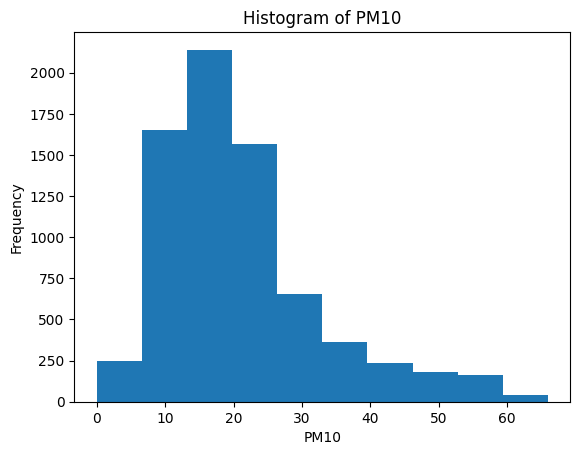

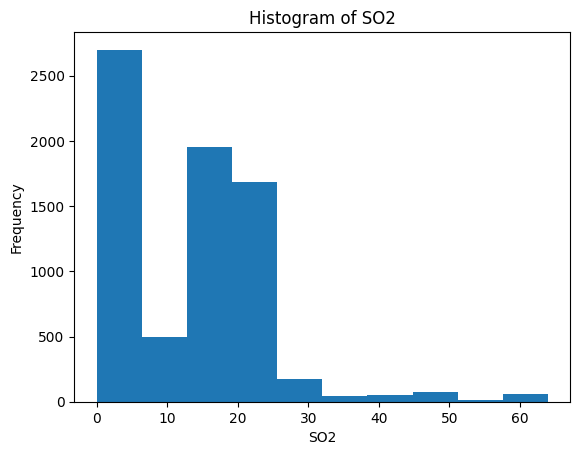

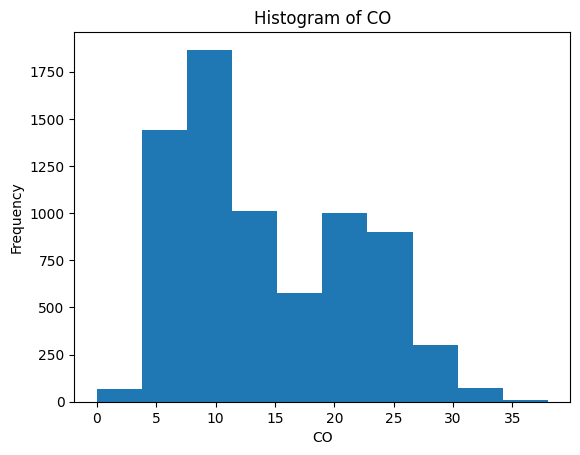

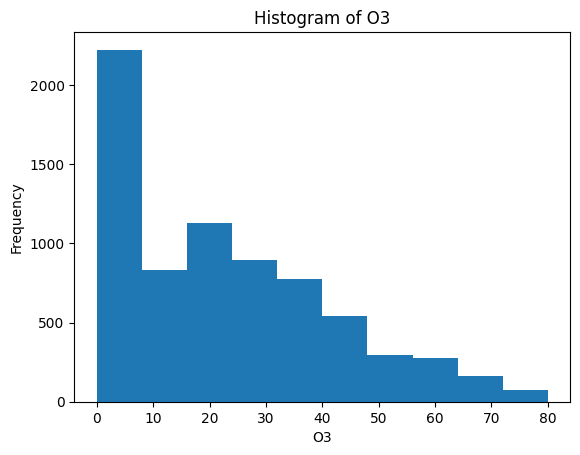

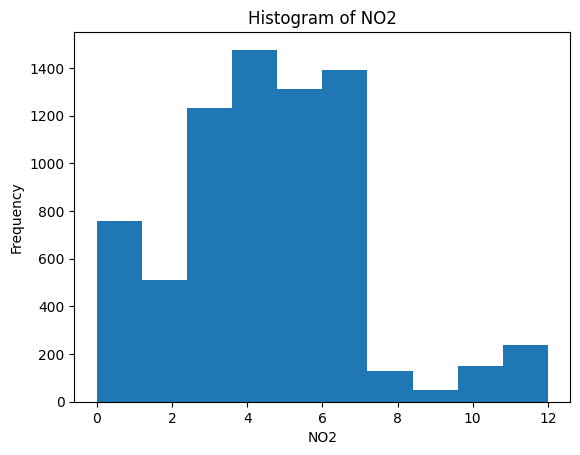

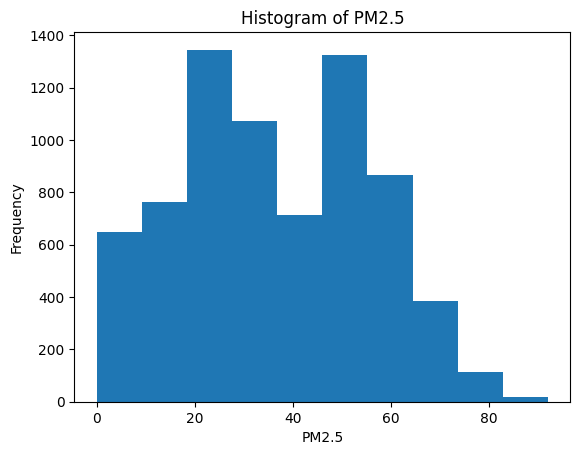

In [14]:
import matplotlib.pyplot as plt

data = {
    'PM10': df['PM10'],
    'SO2': df['SO2'],
    'CO': df['CO'],
    'O3': df['O3'],
    'NO2': df['NO2'],
    'PM2.5': df['PM2.5'],
}

no_bins = 10  # Jumlah bins pada histogram

pollutants = ['PM10', 'SO2', 'CO', 'O3', 'NO2', 'PM2.5']

for pollutant in pollutants:
    plt.hist(data[pollutant], bins=no_bins)
    plt.title('Histogram of {}'.format(pollutant))
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.show()


### KS Test

In [ ]:
from scipy.stats import kstest

alpha = 0.05
nama_kolom = ['PM10', 'SO2', 'CO', 'O3', 'NO2', 'PM2.5']

for nama_kolom in nama_kolom:
    # Melakukan uji normalitas dengan KS Test
    ks_statistic, p_value = kstest(df[nama_kolom], 'norm')

    # Membandingkan nilai p_value dan alpha
    if p_value < alpha:
        hasil = "Tidak Mengikuti Distribusi Normal"
    else:
        hasil = "Mengikuti Distribusi Normal"

    # Menampilkan hasil
    print("Hasil Uji KS kolom", nama_kolom)
    print("KS statistic:", ks_statistic)
    print("P-value:", p_value)
    print("Alpha:", alpha)
    print("Hasil:", hasil)
    print()

Hasil Uji KS kolom PM10
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom SO2
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom CO
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom O3
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom NO2
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom PM2.5
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal



In [ ]:
bulan = pd.DataFrame({
	'Date' : df['Date']
})

bulan['Date'] = pd.to_datetime(bulan['Date'])
grouped_bulan = bulan.groupby(bulan['Date'].dt.strftime('%B'))['Date'].count()

print(grouped_bulan)

Date
April        720
December     647
February     672
January      744
July         380
June         720
March        744
May          744
November     659
October      744
September    475
Name: Date, dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Mengextract bulan dan tahun dari kolom Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

max_values = df.groupby(['Year', 'Month'])[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']].max()

# Menampilkan hasil
print(max_values)

            PM10  PM2.5   SO2    CO    O3   NO2
Year Month                                     
2021 1      35.0   80.0  28.0  33.0  55.0   7.0
     2      30.0   80.0  31.0  38.0  71.0   8.0
     3      41.0   92.0  27.0  24.0  38.0   7.0
     4      66.0   36.0  28.0  24.0  65.0   8.0
     5      41.0   69.0  28.0  18.0  80.0   8.0
     6      52.0   77.0  64.0  22.0  51.0  10.0
     7      35.0   58.0   0.0  14.0  74.0   5.0
     9      24.0   44.0  63.0  14.0  52.0   8.0
     10     23.0   41.0  27.0  16.0  75.0   7.0
     11     45.0   57.0  51.0  30.0  77.0  12.0
     12     51.0   38.0  25.0  26.0  45.0  12.0


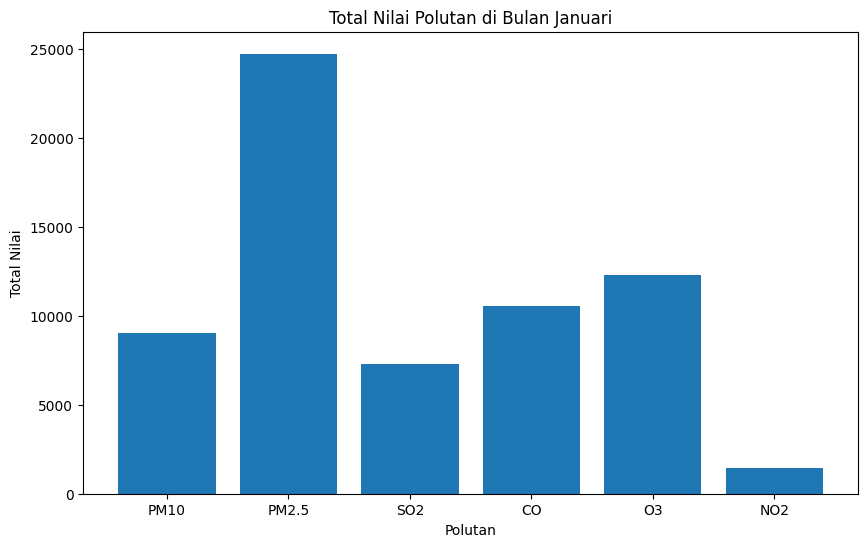

In [ ]:
import matplotlib.pyplot as plt

# Mengubah kolom Date menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengextract bulan dan tahun dari kolom Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Filter dataset hanya untuk bulan Januari
january_df = df[df['Month'] == 1]

# Mengelompokkan data pada bulan Januari berdasarkan polutan, dan mencari nilai terbesar
sum_values_january = january_df.groupby('Category')[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']].sum()

# Membuat bar chart
plt.figure(figsize=(10, 6))

pollutants = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
values = sum_values_january.max().values

plt.bar(pollutants, values)

plt.xlabel('Polutan')
plt.ylabel('Total Nilai')
plt.title('Total Nilai Polutan di Bulan Januari')
plt.show()


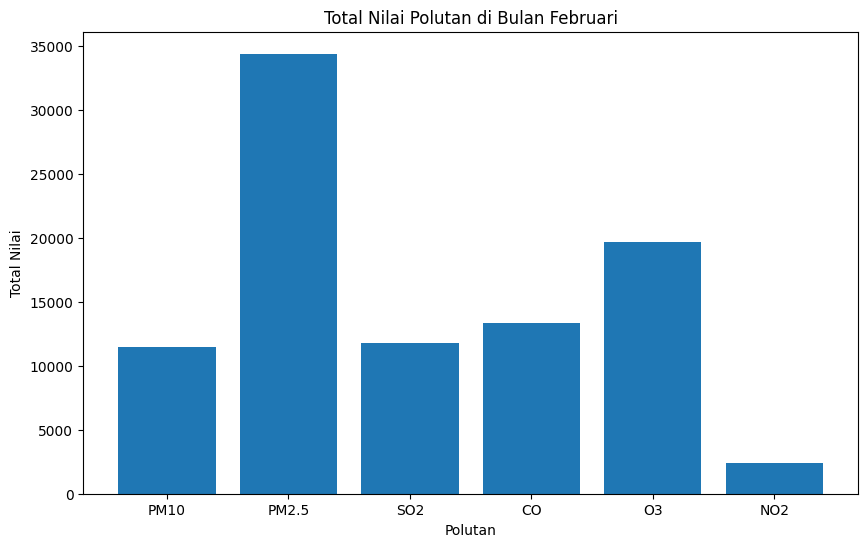

In [ ]:
# Mengubah kolom Date menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengextract bulan dan tahun dari kolom Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Filter dataset hanya untuk bulan Januari
feb_df = df[df['Month'] == 2]

# Mengelompokkan data pada bulan Januari berdasarkan polutan, dan mencari nilai terbesar
sum_values_feb = feb_df.groupby('Category')[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']].sum()

# Membuat bar chart
plt.figure(figsize=(10, 6))

pollutants = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
values = sum_values_feb.max().values

plt.bar(pollutants, values)

plt.xlabel('Polutan')
plt.ylabel('Total Nilai')
plt.title('Total Nilai Polutan di Bulan Februari')
plt.show()


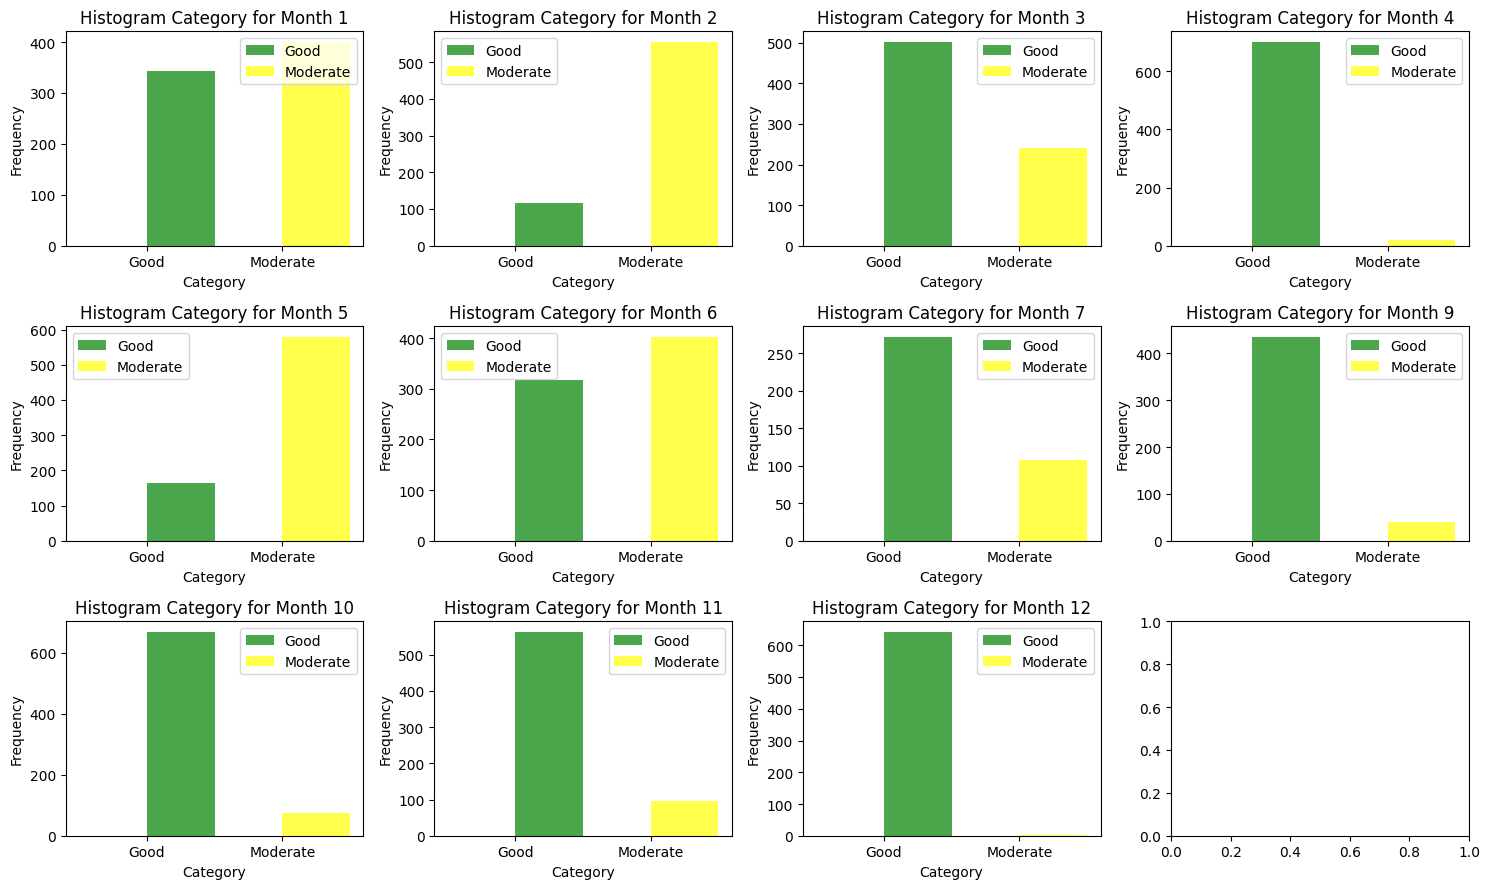

In [ ]:
# Mengubah kolom Date menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengextract bulan dan tahun dari kolom Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Filter dataset hanya untuk kategori Good dan Moderate
filtered_df = df[df['Category'].isin(['Good', 'Moderate'])]

# Membuat subplot untuk 11 bulan (tidak termasuk bulan Agustus)
fig, axs = plt.subplots(3, 4, figsize=(15, 9))

# Membuat histogram per bulan untuk setiap kategori
months = range(1, 13)  # Bulan 1 hingga 12

# Menghitung indeks subplot yang valid
valid_subplots = [i for i, month in enumerate(months) if month != 8]

for i, month in enumerate(valid_subplots):
    month_df = filtered_df[filtered_df['Month'] == month + 1]
    
    # Menentukan posisi subplot
    row = i // 4
    col = i % 4
    
    # Memisahkan data kategori Good dan Moderate
    good_data = month_df[month_df['Category'] == 'Good']
    moderate_data = month_df[month_df['Category'] == 'Moderate']
    
    # Menggambar histogram untuk kategori Good dengan warna hijau
    axs[row, col].hist(good_data['Category'], bins=2, alpha=0.7, color='green', label='Good')
    
    # Menggambar histogram untuk kategori Moderate dengan warna kuning
    axs[row, col].hist(moderate_data['Category'], bins=2, alpha=0.7, color='yellow', label='Moderate')
    
    axs[row, col].set_xlabel('Category')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Histogram Category for Month {}'.format(month + 1))
    axs[row, col].legend()

# Mengatur jarak antar subplot
plt.tight_layout()

# Menampilkan grafik
plt.show()
